In [1]:
#Importing libraries
import math
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("Churn_Modelling.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [5]:
df.drop('CustomerId',axis='columns',inplace=True)

In [6]:
df.drop('Surname',axis='columns',inplace=True)

In [7]:
df.drop('RowNumber',axis='columns',inplace=True)

In [8]:
df.sample(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
2171,526,Germany,Male,58,9,190298.89,2,1,1,191263.76,0
2488,645,Spain,Female,21,1,0.00,2,0,0,28726.07,0
8282,747,France,Female,21,4,81025.60,2,1,0,167682.57,0
1649,731,Spain,Male,41,4,0.00,2,1,0,22299.27,0
6025,601,France,Female,46,3,98202.76,1,0,0,137763.93,0
7581,708,Germany,Male,42,9,176702.36,2,1,1,104804.74,0
4439,613,France,Female,21,7,105627.95,1,1,1,36560.51,0
9317,741,France,Male,42,6,106036.52,1,1,0,194686.78,1
6500,582,France,Female,43,5,153313.67,1,0,0,170563.73,0
5866,735,France,Female,53,8,123845.36,2,0,1,170454.93,1


In [9]:
df.shape

(10000, 11)

In [10]:
df1 = pd.get_dummies(data=df, columns=['Geography','Gender'])
df1.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_France',
       'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male'],
      dtype='object')

In [11]:
df1.shape

(10000, 14)

In [13]:
#Scaling of required columns
cols_to_scale = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [14]:
df1.sample(10)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
2406,0.704,0.189189,0.8,0.285645,0.000000,1,1,0.630413,0,0,0,1,0,1
5666,0.572,0.567568,0.7,0.496009,0.000000,1,1,0.706833,1,0,0,1,0,1
5102,0.624,0.027027,0.9,0.416539,0.333333,0,0,0.365515,0,0,0,1,0,1
2585,0.748,0.135135,0.9,0.000000,0.333333,1,1,0.501191,0,1,0,0,0,1
898,0.346,0.297297,0.2,0.410395,0.000000,1,0,0.643514,1,1,0,0,1,0
8208,0.722,0.148649,0.3,0.518862,0.333333,1,0,0.159014,0,1,0,0,1,0
9484,0.926,0.162162,0.1,0.464001,0.000000,0,1,0.429024,0,0,1,0,0,1
8206,0.460,0.216216,0.6,0.000000,0.333333,1,1,0.800495,0,1,0,0,0,1
269,0.882,0.229730,0.7,0.208994,0.000000,1,0,0.805278,0,0,1,0,1,0
5983,0.538,0.135135,0.6,0.395191,0.333333,1,0,0.242341,0,0,1,0,1,0


In [15]:
#Splitting training and testing sets
x = df1.drop('Exited',axis='columns')
y = df1['Exited']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=5)

In [16]:
x_train.shape

(8000, 13)

In [17]:
x_test.shape

(2000, 13)

In [18]:
x.shape

(10000, 13)

In [19]:
#Neural network model
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(13,),activation="relu"),
    keras.layers.Dense(2, activation="relu"),
    keras.layers.Dense(1,  activation="sigmoid"),
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=500)

Epoch 1/500
250/250 [==============================] - 2s 3ms/step - loss: 0.5601 - accuracy: 0.7960
Epoch 2/500
250/250 [==============================] - 1s 4ms/step - loss: 0.4835 - accuracy: 0.7960
Epoch 3/500
250/250 [==============================] - 1s 3ms/step - loss: 0.4709 - accuracy: 0.7960
Epoch 4/500
250/250 [==============================] - 1s 3ms/step - loss: 0.4638 - accuracy: 0.7960
Epoch 5/500
250/250 [==============================] - 1s 3ms/step - loss: 0.4579 - accuracy: 0.7960
Epoch 6/500
250/250 [==============================] - 1s 3ms/step - loss: 0.4515 - accuracy: 0.7960
Epoch 7/500
250/250 [==============================] - 1s 4ms/step - loss: 0.4464 - accuracy: 0.7960
Epoch 8/500
250/250 [==============================] - 1s 3ms/step - loss: 0.4412 - accuracy: 0.7960
Epoch 9/500
250/250 [==============================] - 1s 3ms/step - loss: 0.4374 - accuracy: 0.7960
Epoch 10/500
250/250 [==============================] - 1s 3ms/step - loss: 0.4338 - accura

250/250 [==============================] - 1s 4ms/step - loss: 0.3337 - accuracy: 0.8636
Epoch 161/500
250/250 [==============================] - 1s 4ms/step - loss: 0.3346 - accuracy: 0.8635
Epoch 162/500
250/250 [==============================] - 1s 5ms/step - loss: 0.3345 - accuracy: 0.8633
Epoch 163/500
250/250 [==============================] - 1s 4ms/step - loss: 0.3344 - accuracy: 0.8630
Epoch 164/500
250/250 [==============================] - 1s 4ms/step - loss: 0.3341 - accuracy: 0.8621
Epoch 165/500
250/250 [==============================] - 1s 4ms/step - loss: 0.3356 - accuracy: 0.8600
Epoch 166/500
250/250 [==============================] - 1s 4ms/step - loss: 0.3339 - accuracy: 0.8625
Epoch 167/500
250/250 [==============================] - 1s 4ms/step - loss: 0.3336 - accuracy: 0.8625
Epoch 168/500
250/250 [==============================] - 1s 3ms/step - loss: 0.3343 - accuracy: 0.8633
Epoch 169/500
250/250 [==============================] - 1s 3ms/step - loss: 0.3336 - a

250/250 [==============================] - 1s 3ms/step - loss: 0.3264 - accuracy: 0.8650
Epoch 319/500
250/250 [==============================] - 1s 4ms/step - loss: 0.3266 - accuracy: 0.8661
Epoch 320/500
250/250 [==============================] - 1s 4ms/step - loss: 0.3268 - accuracy: 0.8648
Epoch 321/500
250/250 [==============================] - 1s 3ms/step - loss: 0.3266 - accuracy: 0.8671
Epoch 322/500
250/250 [==============================] - 1s 4ms/step - loss: 0.3264 - accuracy: 0.8652
Epoch 323/500
250/250 [==============================] - 1s 3ms/step - loss: 0.3254 - accuracy: 0.8673
Epoch 324/500
250/250 [==============================] - 1s 3ms/step - loss: 0.3269 - accuracy: 0.8669
Epoch 325/500
250/250 [==============================] - 1s 3ms/step - loss: 0.3260 - accuracy: 0.8669
Epoch 326/500
250/250 [==============================] - 1s 3ms/step - loss: 0.3263 - accuracy: 0.8643
Epoch 327/500
250/250 [==============================] - 1s 3ms/step - loss: 0.3264 - a

250/250 [==============================] - 1s 3ms/step - loss: 0.3234 - accuracy: 0.8676
Epoch 477/500
250/250 [==============================] - 1s 3ms/step - loss: 0.3235 - accuracy: 0.8664
Epoch 478/500
250/250 [==============================] - 1s 3ms/step - loss: 0.3229 - accuracy: 0.8677
Epoch 479/500
250/250 [==============================] - 1s 3ms/step - loss: 0.3236 - accuracy: 0.8665
Epoch 480/500
250/250 [==============================] - 1s 4ms/step - loss: 0.3235 - accuracy: 0.8666
Epoch 481/500
250/250 [==============================] - 1s 3ms/step - loss: 0.3230 - accuracy: 0.8685
Epoch 482/500
250/250 [==============================] - 1s 3ms/step - loss: 0.3233 - accuracy: 0.8666
Epoch 483/500
250/250 [==============================] - 1s 3ms/step - loss: 0.3234 - accuracy: 0.8641
Epoch 484/500
250/250 [==============================] - 1s 3ms/step - loss: 0.3234 - accuracy: 0.8662
Epoch 485/500
250/250 [==============================] - 1s 3ms/step - loss: 0.3237 - a

In [20]:
model.evaluate(x_train,y_train)

250/250 [==============================] - 2s 4ms/step - loss: 0.3260 - accuracy: 0.8659


[0.32604166865348816, 0.8658750057220459]

In [21]:
model.predict(x_test)

63/63 [==============================] - 0s 4ms/step


array([[0.01958179],
       [0.02733175],
       [0.03733116],
       ...,
       [0.02698267],
       [0.01008067],
       [0.07908714]], dtype=float32)

In [22]:
yp = model.predict(x_test)

63/63 [==============================] - 0s 3ms/step


In [24]:
yp1 = yp.flatten()

In [25]:
y_pred = []
for element in yp1:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [29]:
y_pred

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


Text(95.72222222222221, 0.5, 'Truth')

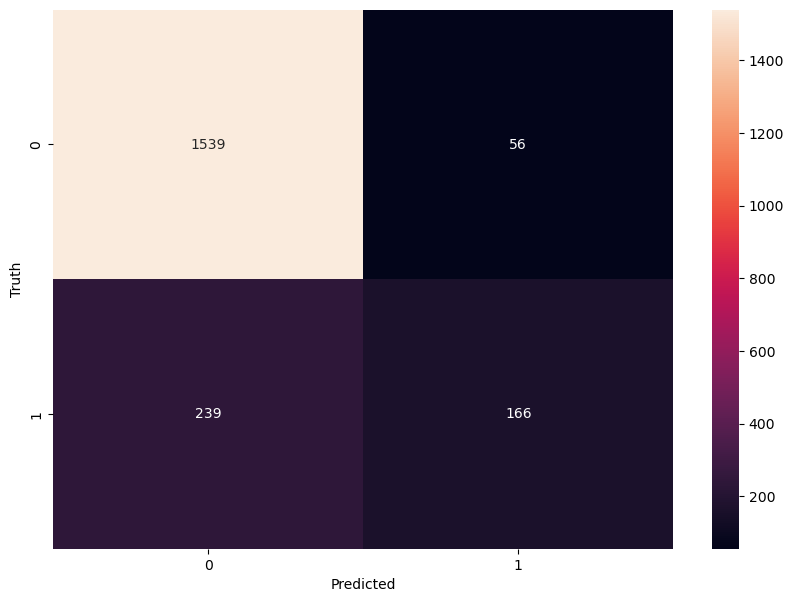

In [28]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [31]:
y_test[:20]

7054    0
442     0
3954    0
2288    0
3196    0
6178    0
8351    0
5658    1
2065    0
413     1
8594    0
1805    0
3631    0
837     0
9322    0
4186    0
6568    0
5401    0
8467    0
1995    0
Name: Exited, dtype: int64

In [32]:
y_pred[:20]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]